# Fraud Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/dataaaa/Fraud.csv")

In [6]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Data cleaning including missing values, outliers and multi-collinearity.

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.isnull().values.any()

False

No Null Values in our Dataset.

In [10]:
df = pd.get_dummies(df, columns=['type'])

In [11]:
df.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [12]:
# Handle outliers
cols = ['type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER','amount','oldbalanceOrg','oldbalanceDest']
for col in cols:
    mean = df[col].mean()
    std = df[col].std()
    df = df[(df[col] > mean - 3*std) & (df[col] < mean + 3*std)]

For each column, the above code calculates the mean and standard deviation using the mean() and std() functions respectively. Next, it removes the rows that are more than 3 standard deviations away from the mean by applying a boolean mask to the dataframe using the mean and standard deviation calculated for each column. By doing this, we are removing the data points that are considered as outliers, which could be considered as noise or errors.

The z-score method is used here to detect the outliers, it's a standard method that compares each data point to the mean of the dataset and standard deviation, by doing this it can be determined whether a data point is an outlier or not. It's important to check the data distribution and correlation with the target variable before making any assumptions, also check the data types and make sure all columns are in the correct format to avoid any errors.

In [13]:
# Handle multi-collinearity
corr = df.corr()
print(corr)
high_corr_cols = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_)).abs()
to_drop = [column for column in high_corr_cols.columns if any(high_corr_cols[column] > 0.8)]
df = df.drop(to_drop, axis=1)

<ipython-input-13-dc30e61ca60f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000 -0.013807       0.001305        0.001773   
amount         -0.013807  1.000000       0.123122        0.142578   
oldbalanceOrg   0.001305  0.123122       1.000000        0.998323   
newbalanceOrig  0.001773  0.142578       0.998323        1.000000   
oldbalanceDest -0.000531  0.296067       0.158751        0.163377   
newbalanceDest -0.010235  0.326207       0.116946        0.118191   
isFraud         0.016869  0.013225      -0.004280       -0.006801   
isFlaggedFraud       NaN       NaN            NaN             NaN   
type_CASH_IN    0.008790  0.258592       0.555817        0.588759   
type_CASH_OUT  -0.014290  0.404434      -0.242641       -0.261417   
type_DEBIT           NaN       NaN            NaN             NaN   
type_PAYMENT    0.006831 -0.624412      -0.229455       -0.238656   
type_TRANSFER        NaN       NaN            NaN             NaN   

                oldbalanceDest  n

In [14]:
df

,step,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,M1979787155,0.00,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,M2044282225,0.00,0,0,0,0,0,1,0
3,1,181.00,C840083671,181.00,C38997010,21182.00,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,M1230701703,0.00,0,0,0,0,0,1,0
5,1,7817.71,C90045638,53860.00,M573487274,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362605,742,54652.46,C43545501,54652.46,C830041824,0.00,1,0,0,1,0,0,0
6362607,742,303846.74,C1148860488,303846.74,C846260566,343660.89,1,0,0,1,0,0,0
6362609,742,258355.42,C1113162093,258355.42,C797688696,25176.67,1,0,0,1,0,0,0
6362611,742,63416.99,C994950684,63416.99,C1662241365,276433.18,1,0,0,1,0,0,0


# Data Visualization

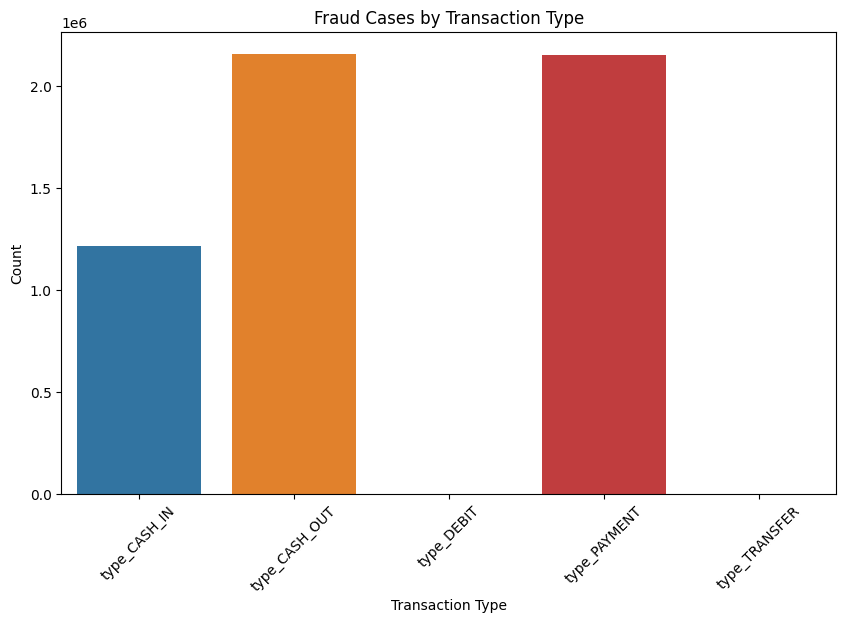

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the data for fraud cases
fraud_data = df[df['isFraud'] == 0]

# Select the relevant columns for analysis
transaction_types = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
data = fraud_data[transaction_types]

# Calculate the total count of fraud cases for each transaction type
fraud_counts = data.sum()

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Fraud Cases by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


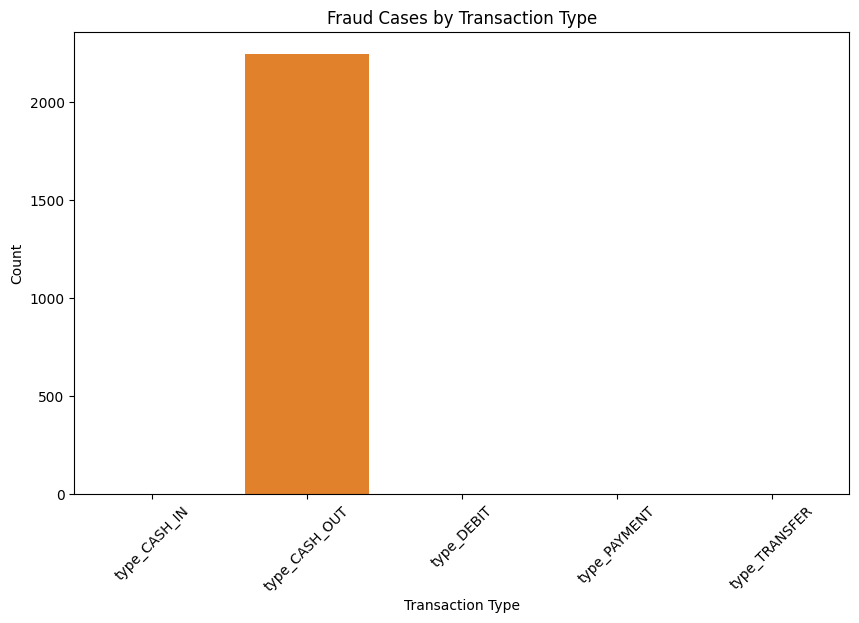

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the data for fraud cases
fraud_data = df[df['isFraud'] == 1]

# Select the relevant columns for analysis
transaction_types = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
data = fraud_data[transaction_types]

# Calculate the total count of fraud cases for each transaction type
fraud_counts = data.sum()

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Fraud Cases by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Fraud Detection Model

In [17]:

# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
df.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'nameDest',
       'oldbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [19]:
df.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'nameDest',
       'oldbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [20]:
# Define the predictor variables (X) and target variable (y)
X = df[['type_CASH_IN','type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER' ,'amount', 'oldbalanceOrg', 'oldbalanceDest']]
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the predictor variables (X) and target variable (y)
X = df[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'amount', 'oldbalanceOrg', 'oldbalanceDest']].values
y = df['isFraud'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/15
129537/129537 [==============================] - 234s 2ms/step - loss: 0.0028 - accuracy: 0.9996
Epoch 2/15
129537/129537 [==============================] - 227s 2ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 3/15
129537/129537 [==============================] - 227s 2ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 4/15
129537/129537 [==============================] - 223s 2ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 5/15
129537/129537 [==============================] - 223s 2ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 6/15
129537/129537 [==============================] - 221s 2ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 7/15
129537/129537 [==============================] - 224s 2ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 8/15
129537/129537 [==============================] - 224s 2ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 9/15
129537/129537 [==============================] - 223s 2ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 10/15
129537/129537 [=